In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


np.random.seed(42)

n = 100

x = np.linspace(-1,1,n)
y = 1/(1+25*x**2) 
y = y.reshape(n,1) 
y_noise = y + np.random.normal(0,0.1)


def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

def polynomial_features(x, p, intercept=False):
    n = len(x)
    k = 0
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1
        k += 1
    else:
        X = np.zeros((n, p))

    for i in range(1, p +1):
        X[:, i + k-1] = x**i 
    return X

def Gradient_OLS(X, y,theta, n=100):
    return (2.0/n)*X.T @ (X @ theta-y)
def Gradient_Ridge(X, y, theta, lambda_param=1.0,n=100):
    return (2.0/n)*X.T @ (X @ theta-y) + 2*lambda_param*theta 

## Part f : Stochastic Gradient Descent

Our last gradient step is to include stochastic gradient descent using the same methods to update
the learning rates as in parts c-e). Compare and discuss your results with and without stochastic
gradient and give a critical assessment of the various methods.

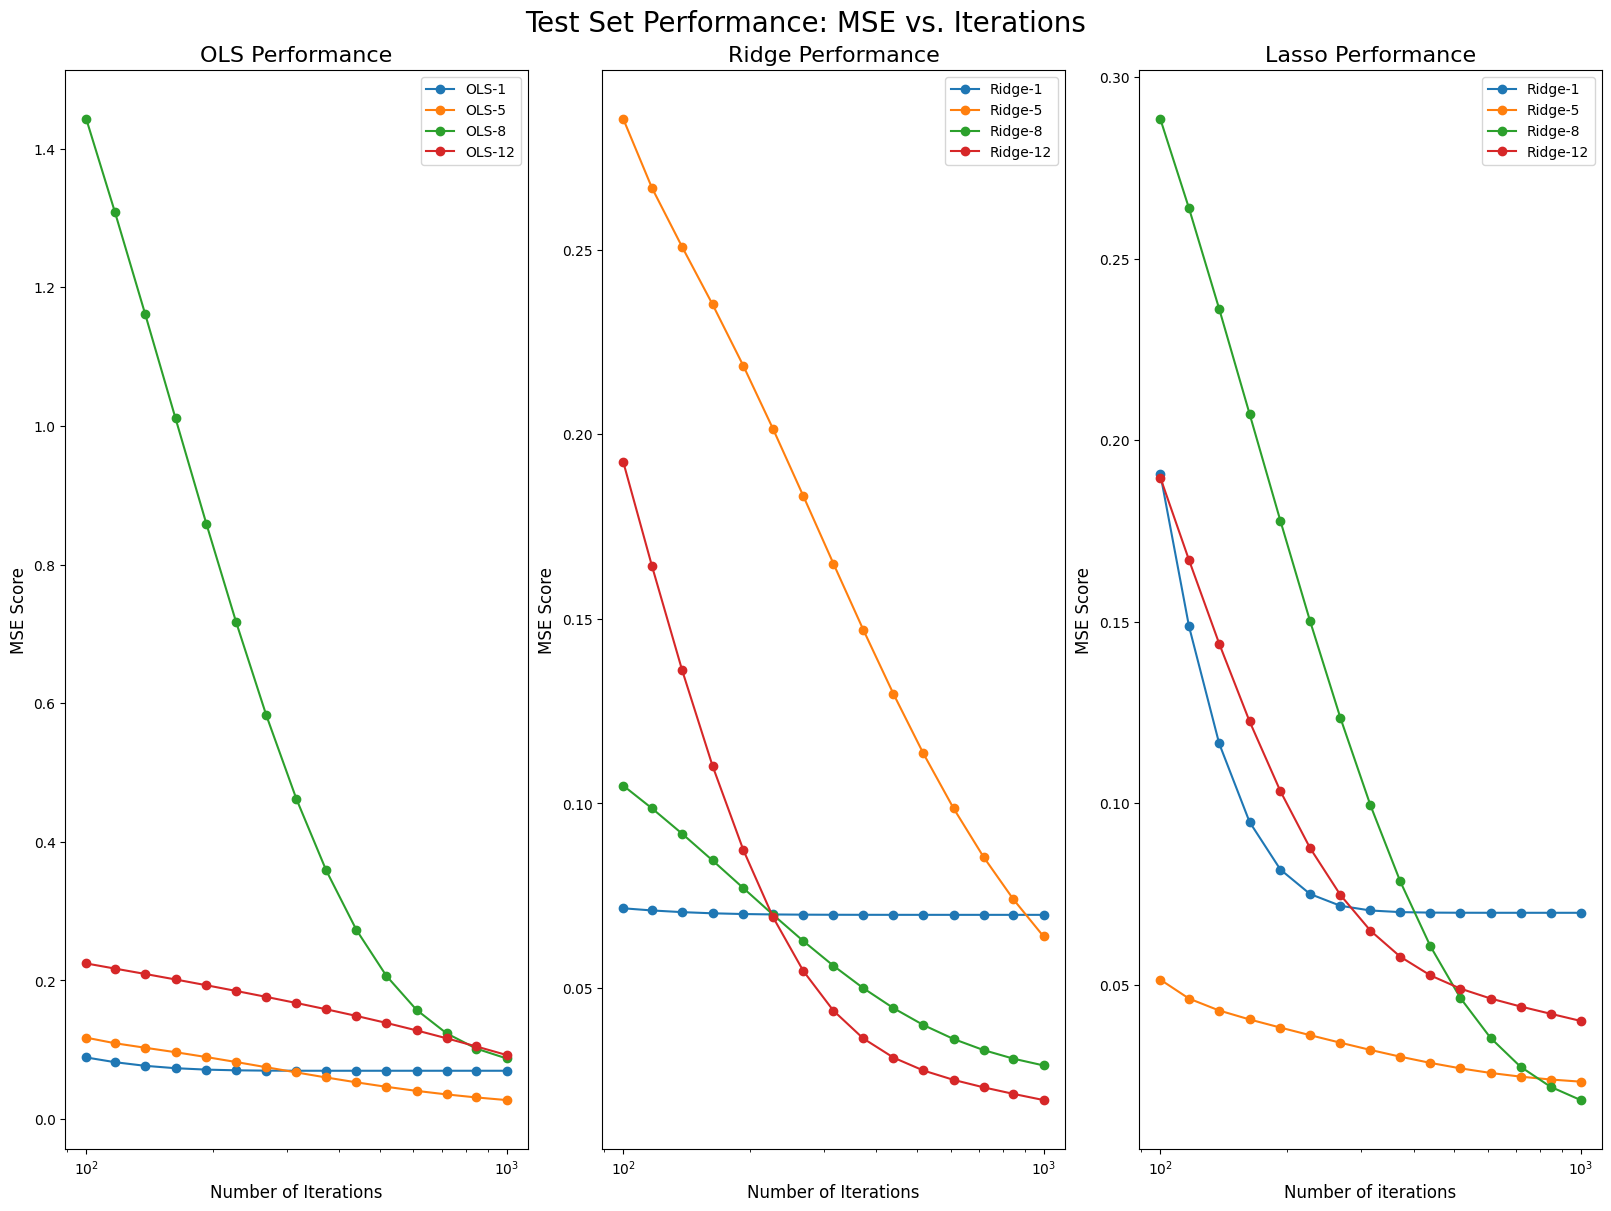

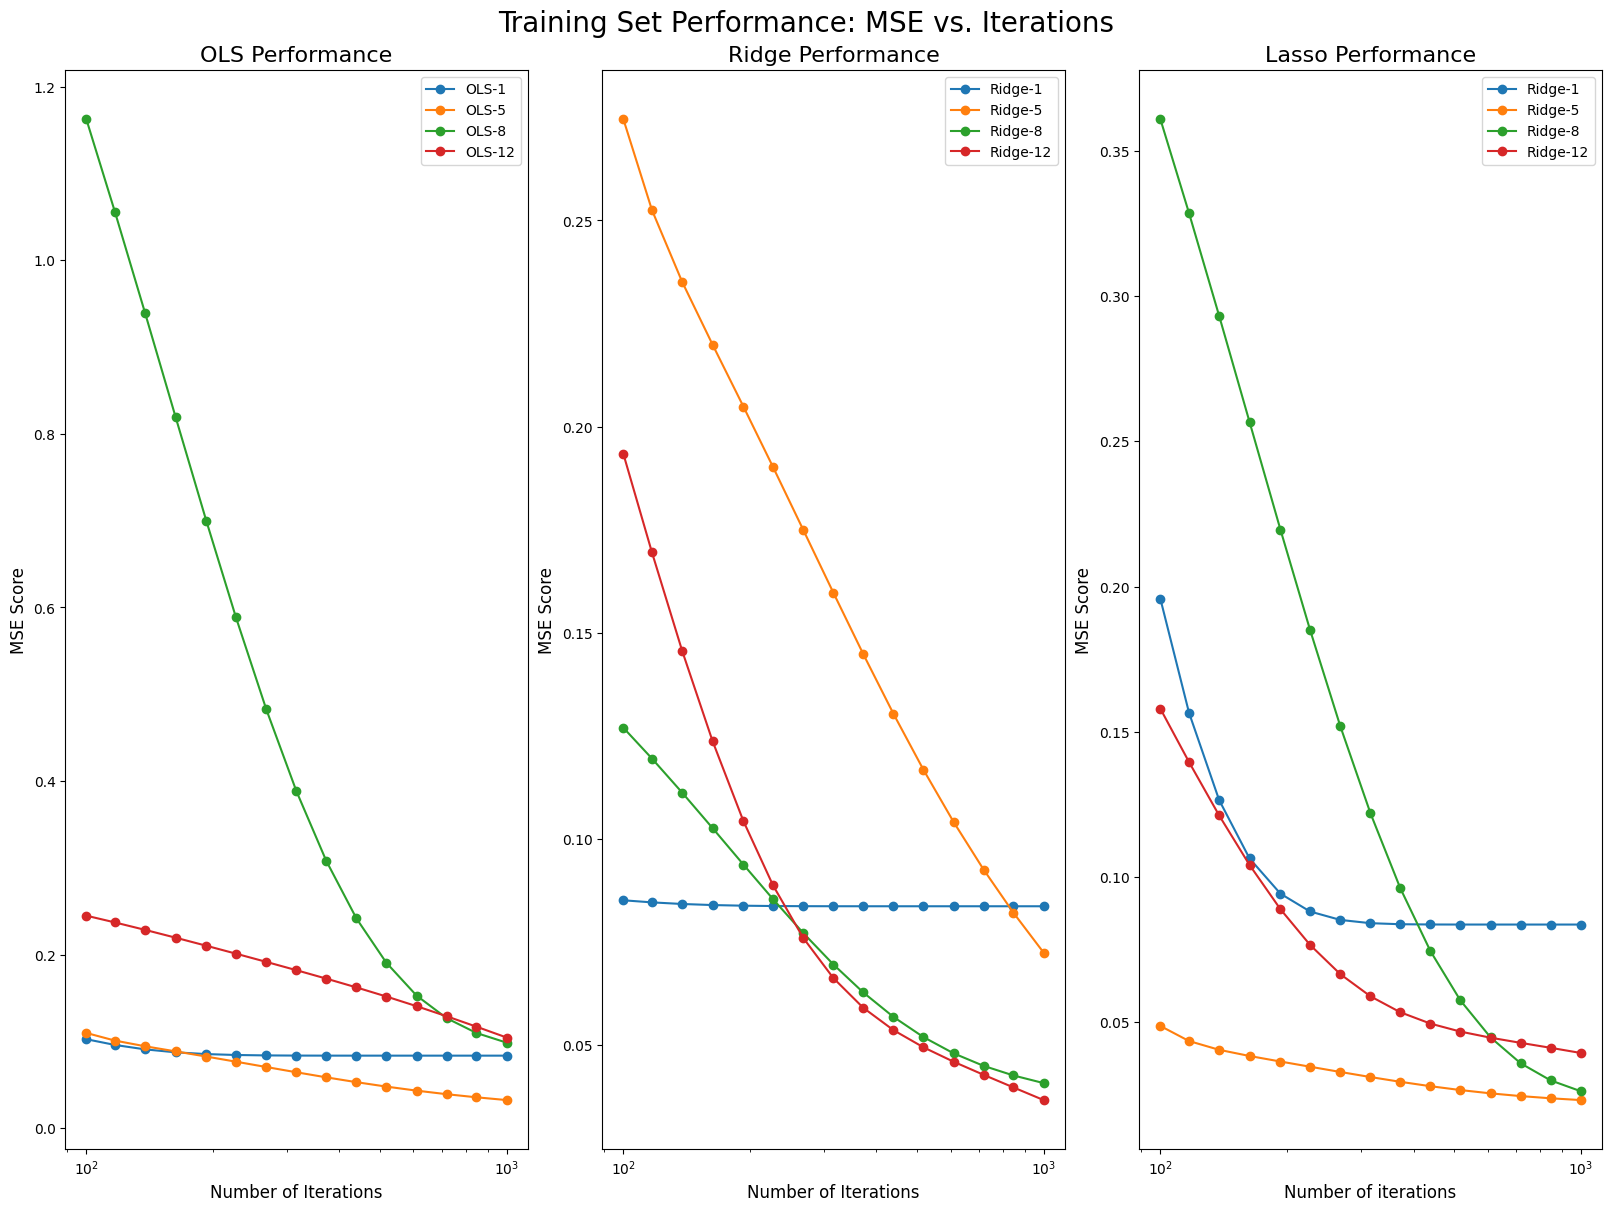

In [2]:
# Gradient descent parameters, learning rate eta first
eta = 0.0001
lam = 0.001
# Then number of iterations
num_iters = 1000
degrees = [1,5,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}, "Lasso" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }, "Lasso": {}}
theta_store = {"OLS": {}, "Ridge": {}, "Lasso": {}}

y_centered = y - y.mean() 

batch_size = 10


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge", "Lasso"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        
        m = len(X_train)
        n_batches = int(m / batch_size)
        for epoch in range(num_iters):
            # Shuffle the data for each epoch
            indices = np.random.permutation(m)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            for i in range(0, m, batch_size):
            # Compute gradients for each batch
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                if key == "OLS":
                    grad = Gradient_OLS(X_train, y_train, theta=theta,n=batch_size)
                elif key =="Ridge":
                    grad= Gradient_Ridge(X_train, y_train,  lambda_param=lam,theta=theta,n=batch_size)
                elif key == "Lasso":
                    grad = Gradient_OLS(X_train, y_train, theta=theta,n=batch_size) + lam * np.sign(theta)
                theta -= eta * grad
            if epoch in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

def plot_mse_vs_iterations(results_dict, title):
    """Helper function to plot MSE vs. iterations."""
    fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(16, 12), constrained_layout=True)
    fig.suptitle(title, fontsize=20)
    for degree in degrees:
        ax1.plot(iter_saves, results_dict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")

        ax2.plot(iter_saves, results_dict["Ridge"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
        ax3.plot(iter_saves, results_dict["Lasso"][degree]["mse"], 'o-', label=f"Ridge-{degree}")
    
    ax1.set_title("OLS Performance", fontsize=16)
    ax1.set_xlabel("Number of Iterations", fontsize=12)
    ax1.set_xscale('log')
    ax1.set_ylabel("MSE Score", fontsize=12)
    ax1.legend(fontsize=10)

    ax2.set_title("Ridge Performance", fontsize=16)
    ax2.set_xlabel("Number of Iterations", fontsize=12)
    ax2.set_xscale('log')
    ax2.set_ylabel("MSE Score", fontsize=12)
    ax2.legend(fontsize=10)

    ax3.set_title("Lasso Performance", fontsize=16)
    ax3.set_xlabel("Number of Iterations", fontsize=12)
    ax3.set_xscale('log')
    ax3.set_ylabel("MSE Score", fontsize=12)
    ax3.legend(fontsize=10)

    plt.xlabel("Number of iterations")
    plt.show()

plot_mse_vs_iterations(plot_predict, "Test Set Performance: MSE vs. Iterations")
plot_mse_vs_iterations(plot_train, "Training Set Performance: MSE vs. Iterations")


NOw compare these results with using a subset with what we get from the earlier parts....